### Data Visualization of Prosper Loan Data Set 

The Prosper Loan dataset is a collection of data from the Prosper financial institution, containing various attributes of borrowers. The goal of the project is to gather and preprocess the dataset to identify accurate and relevant variables for visualization purposes. After cleaning and selecting the relevant data, the project involves creating two plots for each type of visualization: univariate, bivariate, and multivariate.


To work on this project, follow these steps:

1. Open a new Jupyter Notebook and give it a name.

2. Import the necessary libraries, including pandas, numpy, matplotlib.pyplot, and seaborn.

3. Download the Prosper Loan dataset from Kaggle (https://www.kaggle.com/yousuf28/prosper-loan) ↗) and import it into your Jupyter Notebook.

4. Take a glimpse of the dataset by viewing the first few rows and examining the data types.

5. Slice the dataset and select a few relevant columns for visualization.

6. Identify any cleaning issues in the selected dataset, such as missing values or outliers, and address them appropriately.

7. Plot at least two plots for each type of visualization: two univariate plots, two bivariate plots, and two multivariate plots.

8. Analyze the visualizations and extract insights from them.

9. Document the insights in a summary format.

By following these steps, you will be able to perform data visualization on the Prosper Loan dataset and gain valuable insights from the visualizations.

### Lets Start 

2. Import the necessary libraries, including pandas, numpy, matplotlib.pyplot, and seaborn.

In [31]:
import pandas as pd 
import os 
import numpy as np
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt 

%matplotlib inline

3. Download the Prosper Loan dataset from Kaggle (https://www.kaggle.com/yousuf28/prosper-loan) ↗) and import it into your Jupyter Notebook.

In [19]:
dp = pd.read_csv('data/prosperLoanData.csv')

In [20]:
# We make a copy of the original dataframe.
df = dp.copy()

4. Take a glimpse of the dataset by viewing the first few rows and examining the data types.

In [21]:
# We see a glipmse of our dataset
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


5. Slice the dataset and select a few relevant columns for visualization.

In [22]:
import pandas as pd

# Assuming you have already loaded the Prosper Loan dataset into a DataFrame called 'df'

# Selecting relevant columns
relevant_columns = ['LoanStatus', 'LoanOriginalAmount', 'BorrowerRate', 'ProsperRating (Alpha)', 'EmploymentStatus', 'IncomeRange']

# Slicing the DataFrame to keep only the relevant columns
df_selected = df[relevant_columns]

# Displaying the selected columns
print(df_selected.head())

  LoanStatus  LoanOriginalAmount  BorrowerRate ProsperRating (Alpha)   
0  Completed                9425        0.1580                   NaN  \
1    Current               10000        0.0920                     A   
2  Completed                3001        0.2750                   NaN   
3    Current               10000        0.0974                     A   
4    Current               15000        0.2085                     D   

  EmploymentStatus     IncomeRange  
0    Self-employed  $25,000-49,999  
1         Employed  $50,000-74,999  
2    Not available   Not displayed  
3         Employed  $25,000-49,999  
4         Employed       $100,000+  


6. Identify any cleaning issues in the selected dataset, such as missing values or outliers, and address them appropriately.

In [23]:
import pandas as pd

# Assuming you have already sliced the relevant columns into a DataFrame called 'df_selected'

# Identify missing values
missing_values = df_selected.isnull().sum()
print("Missing values:\n", missing_values)

# Dealing with missing values
# Remove rows with missing values
df_cleaned = df_selected.dropna()

# Identify outliers
outliers = df_cleaned[['LoanOriginalAmount', 'BorrowerRate']].quantile([0.25, 0.75])
print("Outliers:\n", outliers)

# Dealing with outliers
# Remove outliers using the interquartile range (IQR) method
Q1 = df_cleaned['LoanOriginalAmount'].quantile(0.25)
Q3 = df_cleaned['LoanOriginalAmount'].quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_cleaned[(df_cleaned['LoanOriginalAmount'] >= Q1 - 1.5 * IQR) & (df_cleaned['LoanOriginalAmount'] <= Q3 + 1.5 * IQR)]

# Display cleaned dataset
print("Cleaned dataset:\n", df_cleaned)

Missing values:
 LoanStatus                   0
LoanOriginalAmount           0
BorrowerRate                 0
ProsperRating (Alpha)    29084
EmploymentStatus          2255
IncomeRange                  0
dtype: int64
Outliers:
       LoanOriginalAmount  BorrowerRate
0.25              4000.0        0.1359
0.75             13500.0        0.2574
Cleaned dataset:
                     LoanStatus  LoanOriginalAmount  BorrowerRate   
1                      Current               10000        0.0920  \
3                      Current               10000        0.0974   
4                      Current               15000        0.2085   
5                      Current               15000        0.1314   
6                      Current                3000        0.2712   
...                        ...                 ...           ...   
113932                 Current               10000        0.1864   
113933  FinalPaymentInProgress                2000        0.1110   
113934                 Cur

7. Plot at least two plots for each type of visualization: two univariate plots, two bivariate plots, and two multivariate plots.

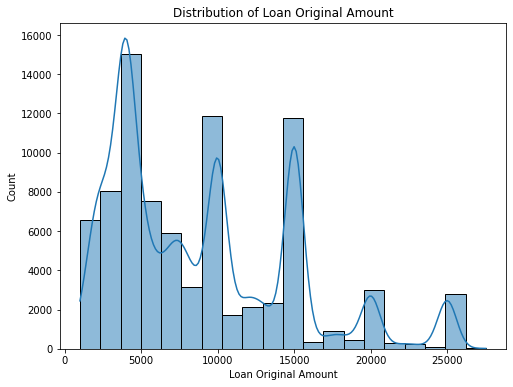

In [25]:
# Assuming you have already cleaned the dataset and stored it in a DataFrame called 'df_cleaned'

# Univariate Plots

# Histogram of LoanOriginalAmount
plt.figure(figsize=(8, 6))
sns.histplot(data=df_cleaned, x='LoanOriginalAmount', bins=20, kde=True)
plt.title('Distribution of Loan Original Amount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.show()


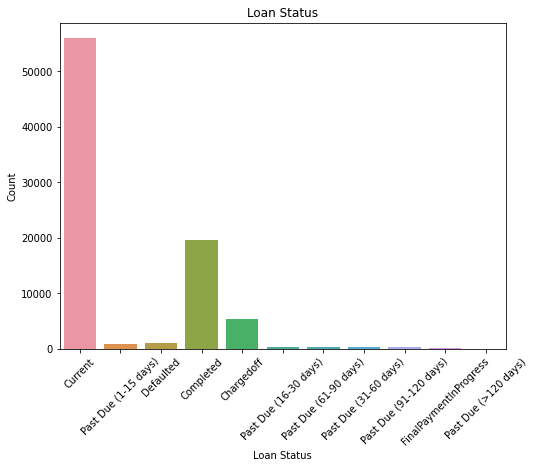

In [26]:
# Bar plot of LoanStatus
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='LoanStatus')
plt.title('Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


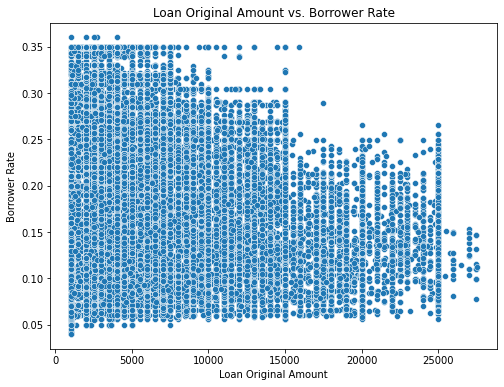

In [27]:
# Bivariate Plots

# Scatter plot of LoanOriginalAmount vs. BorrowerRate
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='LoanOriginalAmount', y='BorrowerRate')
plt.title('Loan Original Amount vs. Borrower Rate')
plt.xlabel('Loan Original Amount')
plt.ylabel('Borrower Rate')
plt.show()

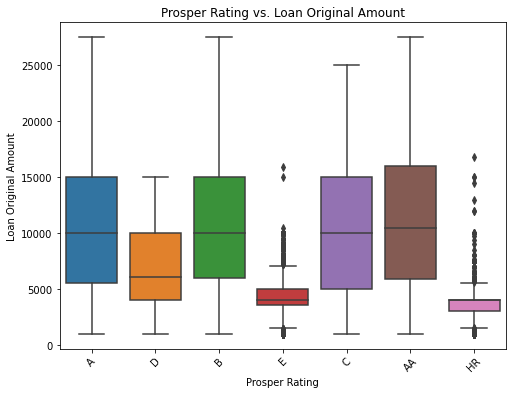

In [28]:
# Box plot of ProsperRating (Alpha) vs. LoanOriginalAmount
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='ProsperRating (Alpha)', y='LoanOriginalAmount')
plt.title('Prosper Rating vs. Loan Original Amount')
plt.xlabel('Prosper Rating')
plt.ylabel('Loan Original Amount')
plt.xticks(rotation=45)
plt.show()


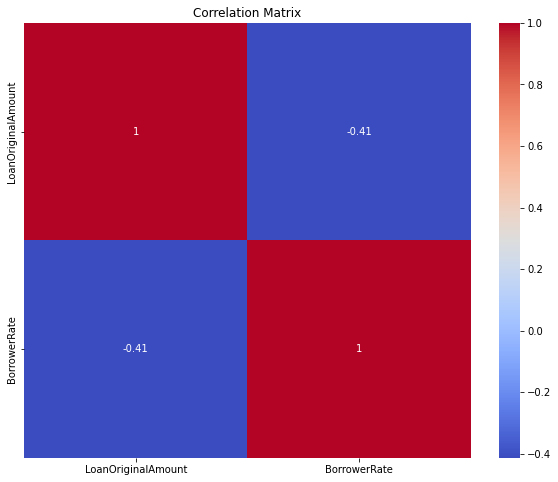

In [33]:
# Multivariate Plots
# Select only the numeric columns
df_numeric = df_cleaned.select_dtypes(include='number')

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

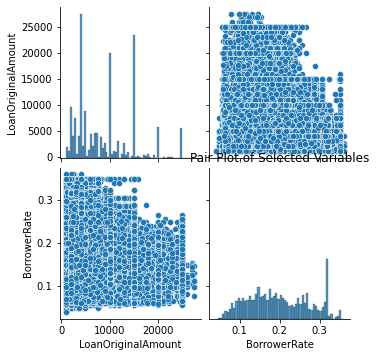

In [32]:
# Pair plot of selected variables
selected_variables = ['LoanOriginalAmount', 'BorrowerRate', 'ProsperRating (Alpha)', 'EmploymentStatus']
sns.pairplot(df_cleaned[selected_variables])
plt.title('Pair Plot of Selected Variables')
plt.show()